   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

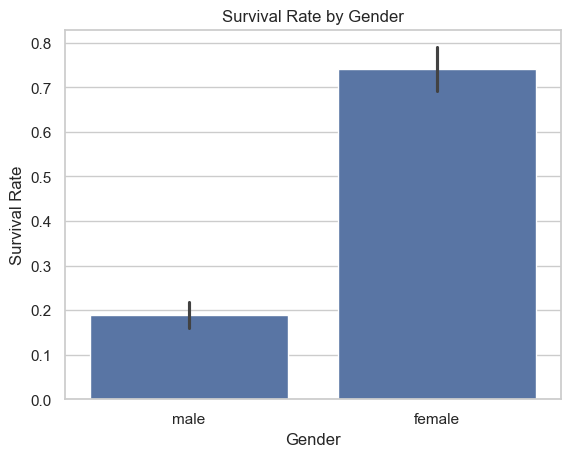

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


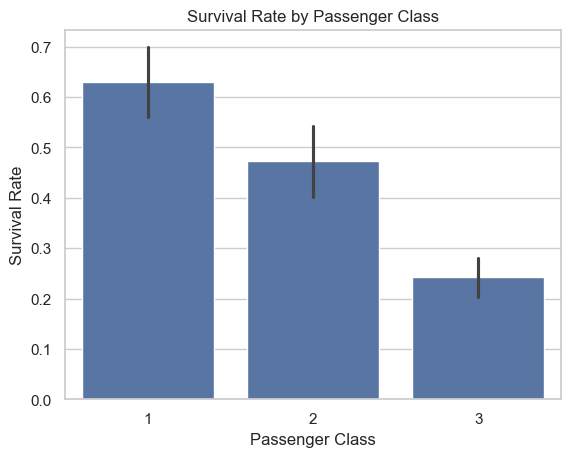

AgeGroup
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64
AgeGroup
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


C:\Users\cdh01\AppData\Local\Temp\ipykernel_21256\2916192542.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")["Survived"].mean())
C:\Users\cdh01\AppData\Local\Temp\ipykernel_21256\2916192542.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[df["AgeGroup"].notnull()].groupby("AgeGroup")["Survived"].mean()


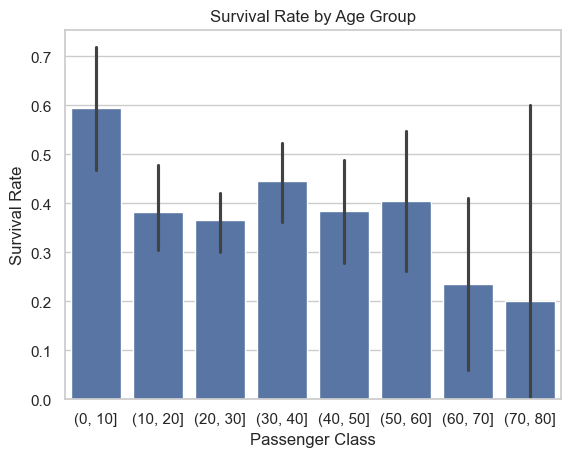

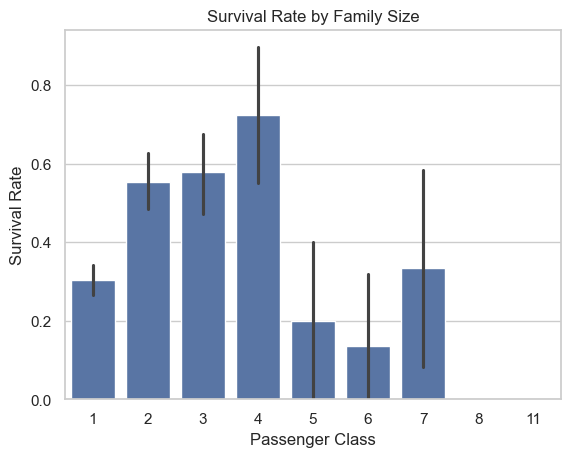

FareGroup
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


C:\Users\cdh01\AppData\Local\Temp\ipykernel_21256\2916192542.py:112: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("FareGroup")["Survived"].mean()
C:\Users\cdh01\AppData\Local\Temp\ipykernel_21256\2916192542.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("FareGroup")["Survived"].mean())


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic training dataset
df = pd.read_csv(r"C:/Users/cdh01/Desktop/titanic-survival-prediction/data/train.csv")


# Display the first 5 rows
print(df.head())

# Show dataset structure and missing values
print(df.info())

# Show basic statistical summaries
print(df.describe())

# Check number of missing values in each column
print(df.isnull().sum())


## EDA ##


# Check survival rate by gender
print(df.groupby("Sex")["Survived"].mean())

# Set plot style
sns.set(style="whitegrid")

# Create bar plot: survival rate by gender
sns.barplot(x="Sex", y="Survived", data=df)

# Set plot title and labels
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")

# Show plot
plt.show()


# Check survival rate by Passenger Class
print(df.groupby("Pclass")["Survived"].mean())

# Set plot style
sns.set(style="whitegrid")

# Create bar plot: survival rate by Passenger Class
sns.barplot(x="Pclass", y="Survived", data=df)

# Set plot title and labels
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")

# Show plot
plt.show()

# Check survival rate by Age

# Create age bins (you decide the bins)
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
print(df.groupby("AgeGroup")["Survived"].mean())

age_survival = df[df["AgeGroup"].notnull()].groupby("AgeGroup")["Survived"].mean()
print(age_survival)

# Set plot style
sns.set(style="whitegrid")

# Create bar plot: survival rate by Age
sns.barplot(x="AgeGroup", y="Survived", data=df)

# Set plot title and labels
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")

# Show plot
plt.show()


# Create new column 'FamilySize'
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df.groupby("FamilySize")["Survived"].mean()

# Set plot style
sns.set(style="whitegrid")

# Create bar plot: survival rate by Family Size
sns.barplot(x="FamilySize", y="Survived", data=df)

# Set plot title and labels
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")

# Show plot
plt.show()

# Check survival rate by Passenger Class and Gender
df.groupby(["Sex", "Pclass"])["Survived"].mean()


# Check survival rate by Ticket Fare
# Make fare bins (you choose how)
df["FareGroup"] = pd.qcut(df["Fare"], q=4)  # Dividing into 4

# Check survival rate by fare group
df.groupby("FareGroup")["Survived"].mean()

print(df.groupby("FareGroup")["Survived"].mean())

# Check survival rate by boarding alone
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
print(df.groupby("IsAlone")["Survived"].mean())

In [7]:
## Preprocessing ##

# Filling Missing Values for Age with median 
df["Age"].fillna(df["Age"].median(), inplace=True)
print(df["Age"].isnull().sum())



0


C:\Users\cdh01\AppData\Local\Temp\ipykernel_21256\4184161923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [8]:
# Filling missing values for Embarked with mode

df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Embarked"].isnull().sum()

C:\Users\cdh01\AppData\Local\Temp\ipykernel_21256\2391105373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


0

In [9]:

df.drop("Cabin", axis=1, inplace=True)
print("Cabin" in df.columns) 

False


In [10]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup', 'FamilySize', 'FareGroup', 'IsAlone'],
      dtype='object')

In [11]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [ ]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [ ]:
df = pd.get_dummies(df, columns=["Pclass"], drop_first=True)

In [12]:
print(df.head())
print(df.dtypes)


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  AgeGroup  \
0         0       3    0  22.0      1      0   7.2500        S  (20, 30]   
1         1       1    1  38.0      1      0  71.2833        C  (30, 40]   
2         1       3    1  26.0      0      0   7.9250        S  (20, 30]   
3         1       1    1  35.0      1      0  53.1000        S  (30, 40]   
4         0       3    0  35.0      0      0   8.0500        S  (30, 40]   

   FamilySize        FareGroup  IsAlone  
0           2   (-0.001, 7.91]        0  
1           2  (31.0, 512.329]        0  
2           1   (7.91, 14.454]        1  
3           2  (31.0, 512.329]        0  
4           1   (7.91, 14.454]        1  
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
AgeGroup      category
FamilySize       int64
FareGroup     category
IsAlone          int32
dtype: object
